# Creating a Neural Network from scratch
The Neural Network consists of a input and output layers consisting of 2 neurons and a single hidden layer with 3 neurons

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [20]:
# X - > Inputs and Y -> Expected outputs
x, y = sklearn.datasets.make_moons(200, noise=0.15) # 200 samples with 15% noise

In [21]:
x

array([[-9.34945887e-01,  9.54594954e-02],
       [ 1.91108728e+00,  1.69734556e-03],
       [ 8.64570723e-01,  8.60568435e-01],
       [-6.88038730e-01,  6.68618520e-01],
       [ 7.60186882e-01,  6.70359282e-01],
       [ 1.66975669e+00, -6.55784225e-02],
       [ 5.15787804e-01,  6.18201499e-01],
       [-1.02235745e+00,  1.90199621e-01],
       [ 2.02824108e-01, -1.66303123e-01],
       [ 4.92046776e-01,  8.30884175e-01],
       [-8.73226533e-01,  1.31066689e-01],
       [-8.23747986e-01,  1.21034005e-01],
       [ 1.90303358e-01,  7.90372263e-01],
       [ 1.94605684e-01,  9.80648990e-01],
       [ 1.79222067e+00,  4.30746841e-01],
       [ 1.96820208e+00, -7.86059205e-02],
       [-9.37638063e-02,  7.49383959e-02],
       [ 4.73346792e-01,  6.22785215e-01],
       [ 1.70012461e+00, -2.00580763e-01],
       [ 1.86076797e+00, -2.98451898e-01],
       [ 7.38656641e-01, -2.94111793e-01],
       [ 9.50380587e-01,  4.59710386e-01],
       [ 1.23535825e+00, -4.15626436e-01],
       [ 1.

In [22]:
#Actual Output
#Since there are two output neurons, this matrice consists of the correct neuron index for all 200 samples
y

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0], dtype=int64)

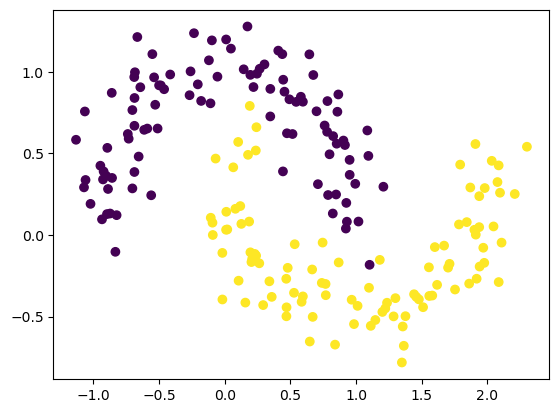

In [23]:
# Syntax: plt.scatter(inputs(first feature), inputs(second feature), color)
plt.scatter(x[:, 0], x[:, 1], c=y)

In [24]:
print(x.shape) #200 samples with 2 features
print(y.shape) #200 samples with 1 output

(200, 2)
(200,)


<div style="text-align:center;"><img src="./Images/scratch_nn.png"></div>

# Input Layer matrix
200 samples with 2 features each like given below

<pre>
            Feature 1       Feature 2
Sample 1    0.6             0.5         
Sample 2    0.9             0.4
.
.
.
Sample 200  0.1             0.01
</pre>


# Input to Hidden layer weights

<pre>
            Output1         Output2         Output3
Input1      <span style="color:red;">w1              w2              w3</span>
Input2      <span style="color:green;">w4              w5              w6</span>

</pre>

Dot Product => 200x2 (input matrix) * 2x3 (weight matrix) = 200x3 (input to next layer)

Dot Product => 200x3 (hidden layer) * 3x2 (weight matrix) = 200x2 (output layer)

In [25]:
# Declaring Hyperparameters
input_neurons = 2
output_neurons = 2
samples = x.shape[0]
learning_rate = 0.001
lambda_param = 0.01

In [26]:
# Model is stored in form of a dictionary
w1 = []
w2 = []
b1 =[]
b2 = []
model_dict = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

In [27]:
# Function to retrieve the model weights and biases
def retreive(model_dict):
    w1 = model_dict['w1']
    b1 = model_dict['b1']
    w2 = model_dict['w2']
    b2 = model_dict['b2']
    return w1, b1, w2, b2

In [28]:
#Fuction for forward propagation, parameters(input, model)
def forward(x, model_dict):
    w1, b1, w2, b2 = retreive(model_dict)
    z1 = x.dot(w1) + b1 #Hidden Layer
    a1 = np.tanh(z1) #Activation Function

    z2 = a1.dot(w2) + b2 #Output Layer
    a2 = np.tanh(z2) #Activation Function

    #Softmax Function
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores, dim = 1, keepdims=True)

    return z1, a1, softmax

In [29]:
#Function for calculating loss (loss function => Cross Entropy Loss), paramters(predicted_out, actual_out)
def loss(softmax, y, model_dict):
    w1, b1, w2, b2 = retreive(model_dict)

    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted

    log_prob = -np.log(predicted)
    softmax_loss = np.sum(log_prob)
    reg_loss = lambda_param/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2))) #Regularization
    loss = softmax_loss + reg_loss

    return float(loss/y.shape[0])

In [30]:
#Function for predicting outputs
def predict(x, model_dict):
    w1, b1, w2, b2 = retreive(model_dict)
    z1 = x.dot(w1) + b1 #Hidden Layer
    a1 = np.tanh(z1) #Activation Function

    z2 = a1.dot(w2) + b2 #Output Layer
    a2 = np.tanh(z2) #Activation Function

    #Softmax Function
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores, dim = 1, keepdims=True)

    return np.argmax(softmax, axis=1) #This return the index of the max prediction in the sameples

# Equation for BackPropagation

![backprop](https://user-images.githubusercontent.com/30661597/67566804-3e405980-f75b-11e9-9e19-f3c388745c0a.png)

<pre>A1, A2 and A3 are the output of the hidden layers</pre>


## $\frac{\partial L}{\partial y_{1}}=-\tilde{y}_{1}\left[\frac{\left(y_{1}\right)^{\prime}}{y_{1}}\right]=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]$

## $\frac{\partial y_{1}}{\partial z_{1}}=\frac{\partial}{\partial z_{1}} \cdot \frac{e^{z_{1}}}{e^{z_{1}}+e^{z_{2}}+e^{z_{3}}}$

<pre>Derivative of y1</pre>
![der](https://user-images.githubusercontent.com/46392773/56460220-ec94cc00-63d1-11e9-91d1-b4e3c57c81fd.png)

## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]\frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{y_{1}\left(1-y_{1}\right)}{y_{1}}\right]=-\tilde{y}_{1}\left(1-y_{1}\right)$


Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:


## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}} = -1(1-y_{1}) = y_{1} - 1 = \delta_{3}$



## $\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}$

## $\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}$

## $\frac{\partial L}{\partial b_{2}}=\delta_{3}$

## $\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2$

## $\frac{\partial L}{\partial b_{1}}=\delta 2$

In [31]:
#Function for backpropagation, parameters(input, actual_labels, model, epochs)
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        w1, b1, w2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)
        
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1 #Extracts out predicted values of the expected class (delta3 = probs - 1)
        dw2 = (a1.T).dot(delta3) #a1: (200x3)shape dot (200x2) = (3x2)
        db2 = np.sum(delta3, axis=0, keepdims=True) #(1x2)

        delta2 = delta3.dot(w2.T) * (1 - np.power(np.tanh(z1), 2))
        dw1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)

        #Add reqularization
        dw2 += lambda_param * np.sum(w2)
        dw1 += lambda_param * np.sum(w1)

        #Update weights
        w1 += -learning_rate * dw1  #W = W + (-learning_rate * gradient)
        b1 += -learning_rate * db1
        w2 += -learning_rate * dw2
        b2 += -learning_rate * db2

        #Update dictionary
        model_dict = {'w1': w1, "b1": b1, "w2": w2, "b2": b2}

        #Print loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is : {:3f}".format(i, loss(probs, y, model_dict)))

    return model_dict

In [ ]:
#Function to initialise weights (Technique => Xavier Initialization), parameter(no_of_input_neuron, no_of_hidden_neuron, no_of_output_neuron)
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    w1 = np.random.randn(input_dim, hidden_dim) 
    b1 = np.random.randn(1, hidden_dim) 
    w2 = np.random.randn(hidden_dim, output_dim) 
    b2 = np.random.randn(1, output_dim)
